In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Analysis

In [3]:
df = pd.read_pickle("DF_pred_n250_depth5_encoded.pickle")
df['Close_scaled'] = df['Close_scaled'].astype(float)

In [4]:
df

,Date,Close_scaled,Ticker,Pred
208905,2023-01-03,1.781440,AGG,1.516244
208906,2023-01-03,1.565326,BND,1.514477
208907,2023-01-03,-2.180214,DBC,-1.115822
208908,2023-01-03,-0.078607,DIA,0.175497
208909,2023-01-03,-0.084591,DVY,-0.117052
...,...,...,...,...
259630,2025-02-19,-0.053708,XLK,0.094672
259631,2025-02-19,0.847979,XLP,0.842724
259632,2025-02-19,0.404123,XLU,0.430165
259633,2025-02-19,1.202650,XLV,0.882111


## predicted data

In [5]:
df['Return'] = df.groupby('Ticker')['Pred'].pct_change()

In [6]:
df

,Date,Close_scaled,Ticker,Pred,Return
208905,2023-01-03,1.781440,AGG,1.516244,NaN
208906,2023-01-03,1.565326,BND,1.514477,NaN
208907,2023-01-03,-2.180214,DBC,-1.115822,NaN
208908,2023-01-03,-0.078607,DIA,0.175497,NaN
208909,2023-01-03,-0.084591,DVY,-0.117052,NaN
...,...,...,...,...,...
259630,2025-02-19,-0.053708,XLK,0.094672,-0.776894
259631,2025-02-19,0.847979,XLP,0.842724,-2.056632
259632,2025-02-19,0.404123,XLU,0.430165,-9.291277
259633,2025-02-19,1.202650,XLV,0.882111,-2.966698


In [7]:
df = df[df["Date"] != "2023-01-03"]
dates = sorted(df['Date'].unique())

In [8]:
# based on the day befores top and bottom performers it makes the trading decision
returns_hold = []

for i in range(len(dates) - 1):
    returns = []
    returns = df[df['Date'] == dates[i]][["Ticker", "Return"]]

    # as long as not first day take the top and bottom tickers 
    if i != 0:

        long_ret = df[df["Ticker"].isin(long_ret_ticks)]["Return"]
        short_ret = df[df["Ticker"].isin(short_ret_ticks)]["Return"]

        long_ret_sum = np.mean(long_ret)
        short_ret_sum = np.mean(short_ret)
        
        total_ret = float(long_ret_sum - short_ret_sum)
    
        returns_hold.append(total_ret)
        
  
    sorted_returns = returns.sort_values(by='Return', ascending=False)

    # get the amount for 30%
    n = len(returns)
    k = int(0.3 * n)

    # saves which are the top and bottom
    short_ret = sorted_returns[-k:]
    long_ret = sorted_returns[:k]

    # saves the tickers of the top ones
    long_ret_ticks = long_ret["Ticker"]
    short_ret_ticks = short_ret["Ticker"]    

In [9]:
cs = np.cumsum(returns_hold)

In [10]:
cs[-1]

31.165971915133248

## Actual

In [11]:
df['Return_acc'] = df.groupby('Ticker')['Close_scaled'].pct_change()

/var/folders/z2/8rld8cfs0d5gqdmhnt18k0x00000gn/T/ipykernel_81801/668346609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return_acc'] = df.groupby('Ticker')['Close_scaled'].pct_change()


In [12]:
df

,Date,Close_scaled,Ticker,Pred,Return,Return_acc
209000,2023-01-04,1.676584,AGG,0.829031,-0.453234,NaN
209001,2023-01-04,1.681729,BND,0.911153,-0.398371,NaN
209002,2023-01-04,-1.629304,DBC,-1.269695,0.137901,NaN
209003,2023-01-04,0.330092,DIA,-0.044732,-1.254889,NaN
209004,2023-01-04,0.952916,DVY,1.079092,-10.218888,NaN
...,...,...,...,...,...,...
259630,2025-02-19,-0.053708,XLK,0.094672,-0.776894,-1.092956
259631,2025-02-19,0.847979,XLP,0.842724,-2.056632,1.378167
259632,2025-02-19,0.404123,XLU,0.430165,-9.291277,-0.459169
259633,2025-02-19,1.202650,XLV,0.882111,-2.966698,-6.232553


In [13]:
# based on the day befores top and bottom performers it makes the trading decision
returns_hold_acc = []

for i in range(len(dates) - 1):
    returns = []
    returns = df[df['Date'] == dates[i]][["Ticker", "Return"]]

    # as long as not first day take the top and bottom tickers 
    if i != 0:
        # pull the actual return 
        long_ret = df[df["Ticker"].isin(long_ret_ticks)]["Return_acc"]
        short_ret = df[df["Ticker"].isin(short_ret_ticks)]["Return_acc"]

        long_ret_sum = np.mean(long_ret)
        short_ret_sum = np.mean(short_ret)
        
        total_ret = float(long_ret_sum - short_ret_sum)
    
        returns_hold_acc.append(total_ret)
        
  
    sorted_returns = returns.sort_values(by='Return', ascending=False)

    # get the amount for 30%
    n = len(returns)
    k = int(0.3 * n)

    # saves which are the top and bottom
    short_ret = sorted_returns[-k:]
    long_ret = sorted_returns[:k]

    # saves the tickers of the top ones
    long_ret_ticks = long_ret["Ticker"]
    short_ret_ticks = short_ret["Ticker"]    

In [14]:
cs_acc = np.cumsum(returns_hold_acc)

In [15]:
cs_acc[-1]

57.02262509840438

## Sharpe Ratio

In [16]:
sharpe_ratio_ret = ((np.mean(returns_hold) * 252) / (np.std(returns_hold) * 252 ** 0.5)) 

In [17]:
sharpe_ratio_ret_acc = ((np.mean(returns_hold_acc) * 252) / (np.std(returns_hold_acc) * 252 ** 0.5)) 

In [18]:
sharpe_ratio_ret

1.3967846798769412

In [19]:
sharpe_ratio_ret_acc

0.732915695798847

In [20]:
cs = np.array(cs)

In [21]:
# normalize
cs_mean = cs.mean()
cs_std = cs.std()

cs_norm = (cs - cs_mean) / (cs_std)

In [22]:
print(len(dates[2:]))

531


In [25]:
date_list = pd.to_datetime(dates[2:])


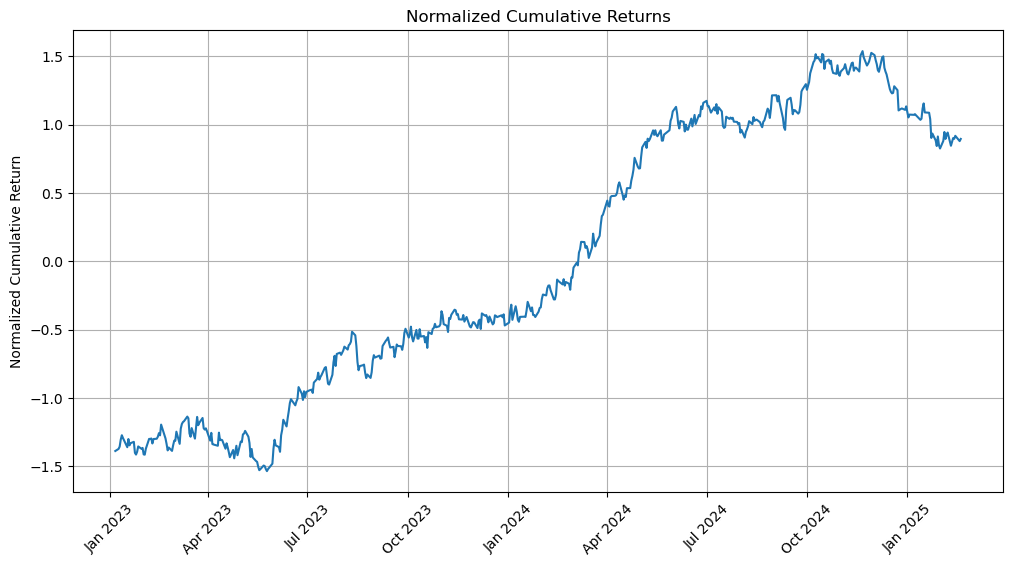

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_list, cs_norm)

ax.grid()
plt.ylabel("Normalized Cumulative Return")
plt.title("Normalized Cumulative Returns")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.savefig("Norm_CumRet_n250_scaled.png", dpi=300, bbox_inches='tight')

## Max Drawdown

In [27]:
cumulative_returns = pd.Series(cs)  # replace with your data

# Compute the running maximum
running_max = cumulative_returns.cummax()

# Compute drawdowns
drawdowns = (cumulative_returns - running_max) / running_max

# Compute max drawdown
max_drawdown = drawdowns.min()

In [28]:
cumulative_returns_acc = pd.Series(cs_acc)  # replace with your data

# Compute the running maximum
running_max_acc = cumulative_returns_acc.cummax()

# Compute drawdowns
drawdowns_acc = (cumulative_returns_acc - running_max_acc) / running_max_acc

# Compute max drawdown
max_drawdown_acc = drawdowns_acc.min()

In [29]:
max_drawdown

-1.5659526221564566

In [30]:
max_drawdown_acc

-1.0488581927360523

## Annualized Return

In [31]:
days = len(dates)
ann_ret = (cs[-1] / 1) ** (252 / days) - 1

In [32]:
days = len(dates)
ann_ret_acc = (cs_acc[-1] / 1) ** (252 / days) - 1

In [33]:
print(ann_ret)

4.0839994788149


In [34]:
print(ann_ret_acc)

5.7647416016536495


## Charts

(array([19358., 19448., 19539., 19631., 19723., 19814., 19905., 19997.,
        20089.]),
 [Text(19358.0, 0, 'Jan 2023'),
  Text(19448.0, 0, 'Apr 2023'),
  Text(19539.0, 0, 'Jul 2023'),
  Text(19631.0, 0, 'Oct 2023'),
  Text(19723.0, 0, 'Jan 2024'),
  Text(19814.0, 0, 'Apr 2024'),
  Text(19905.0, 0, 'Jul 2024'),
  Text(19997.0, 0, 'Oct 2024'),
  Text(20089.0, 0, 'Jan 2025')])

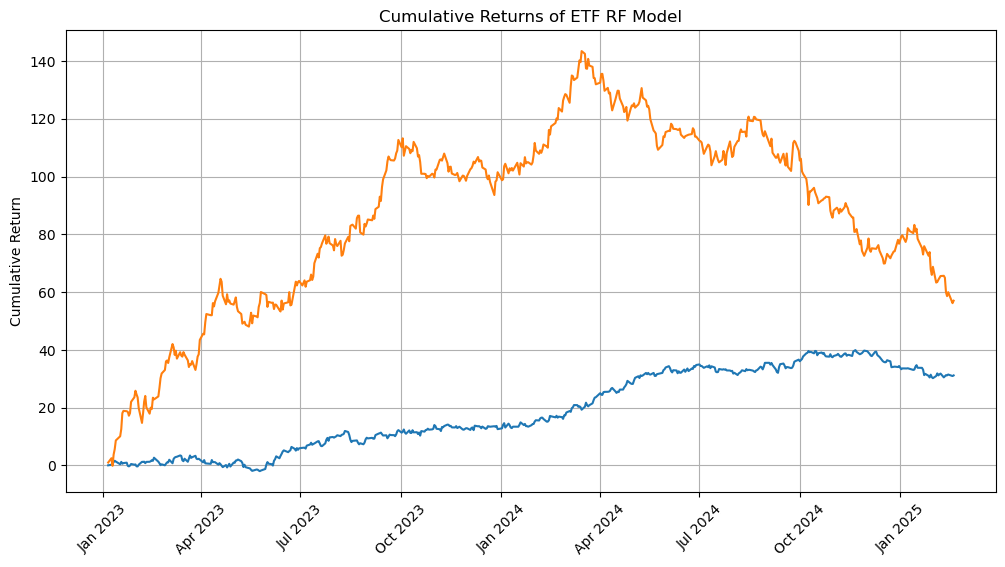

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_list, cs)
ax.plot(date_list, cs_acc)

ax.grid()
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns of ETF RF Model")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

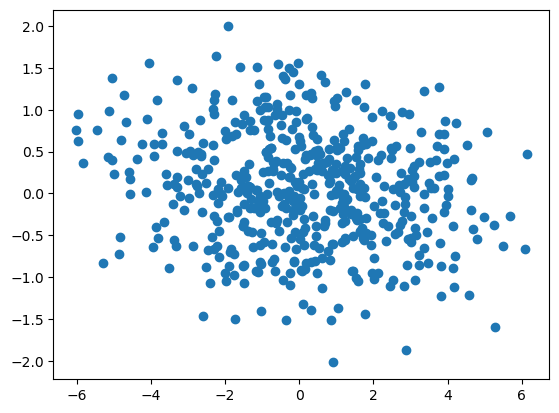

In [37]:
plt.scatter(returns_hold_acc, returns_hold)